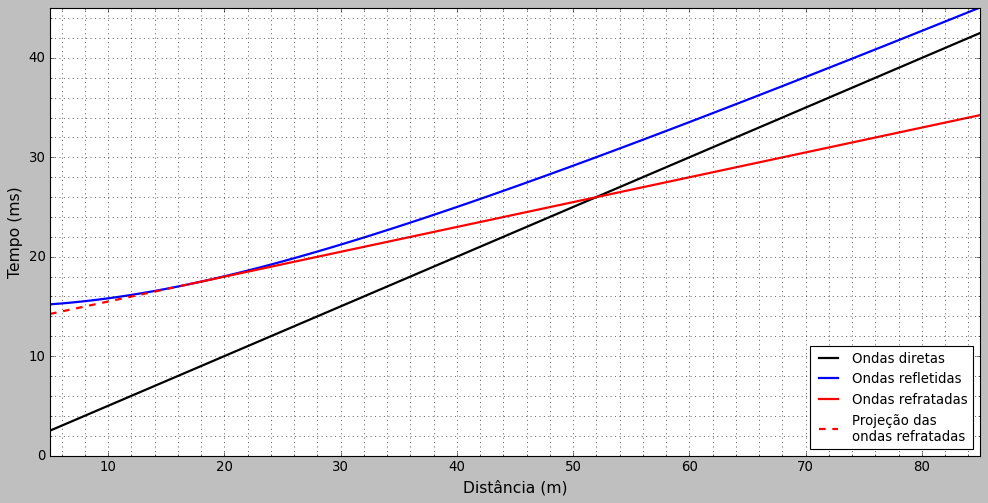

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

dx = 1.0
n_tracos = 81

v1 = 2000    # m/s
v2 = 4000    # m/s
z = 15.0     # m/s

xx = (np.arange(n_tracos)+5) * dx
t_direto = xx / v1
t_refletido = np.sqrt(4*z**2 + xx**2)/v1
t_refratado = (xx/v2) + (  (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)  )

it_crit = np.abs(t_refletido - t_refratado).argmin()

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(1,1,1)
ax.plot(xx, t_direto*1e3, '-k', label='Ondas diretas', linewidth=2)
ax.plot(xx, t_refletido*1e3, '-b', label='Ondas refletidas', linewidth=2)
ax.plot(xx[it_crit:], t_refratado[it_crit:]*1e3, '-r', label='Ondas refratadas', linewidth=2)
ax.plot(xx[:it_crit+1], t_refratado[:it_crit+1]*1e3, '--r', label='Projeção das\nondas refratadas', linewidth=2)
ax.legend(loc='lower right', fontsize='12')
ax.grid(which='both')

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))

ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))

ax.set_xlabel('Distância (m)', fontsize=14)
ax.set_ylabel('Tempo (ms)', fontsize=14)
ax.set_xlim(xx[0], xx[-1])
ax.set_ylim(0, 1e3*np.max(t_refletido))
plt.show()

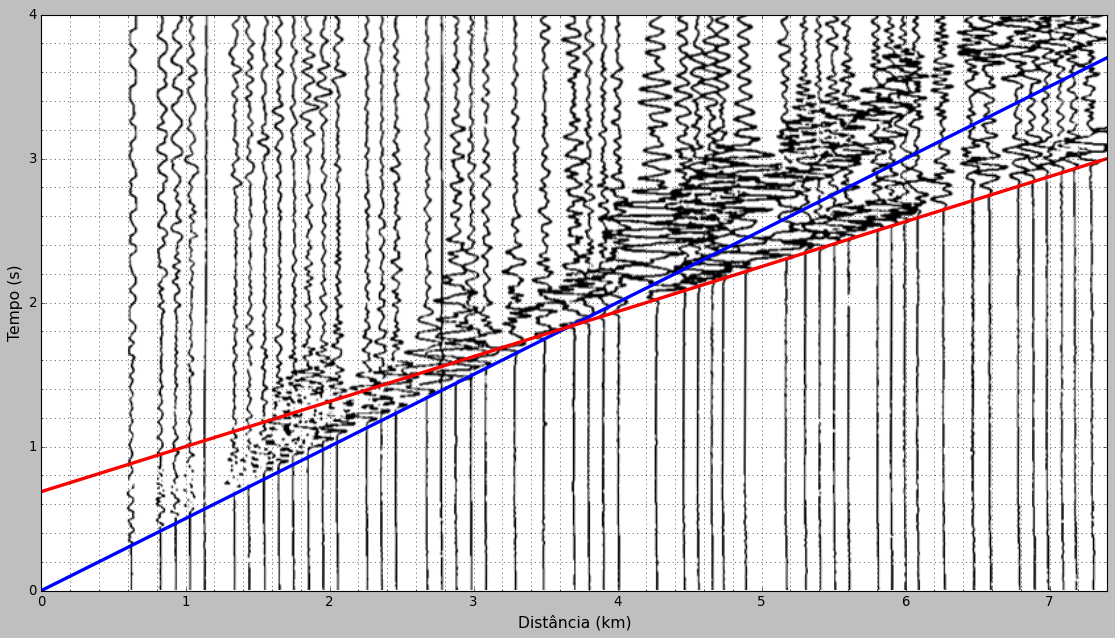

In [2]:
velocidades = [2.0, 3.2]
profundidades = [0.44]

cores = ['blue', 'red', 'lightgreen', 'cyan', 'black']

xx_fig = np.linspace(0, 9, 101)

fig = plt.figure(figsize=(20, 9))
ax = plt.subplot(1,1,1)
img = plt.imread('sismograma.png')
ax.imshow(img, extent=[0, 8.96, -0.10, 5.0])


for i in range(len(velocidades)):
    if i==0:
        v = velocidades[i]
        tt = xx_fig / v
        ti = 0.0
    else:
        v1 = velocidades[i-1]
        v2 = velocidades[i]
        z = profundidades[i-1]
        tt = (xx_fig/v2) + (  (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)  )
        ti = ti + (2*z*np.sqrt(v2**2 - v1**2)) / (v1*v2)
        
    ax.plot(xx_fig, tt + ti, c=cores[i], label='Camada ' + str(i), linewidth=3)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.2))

ax.grid(which='both')
ax.set_xlabel('Distância (km)', fontsize=14)
ax.set_ylabel('Tempo (s)', fontsize=14)
ax.set_xlim([0, 7.4])
ax.set_ylim([0, 4.0])

plt.show()

# $t^2 x^2$ com uma interface

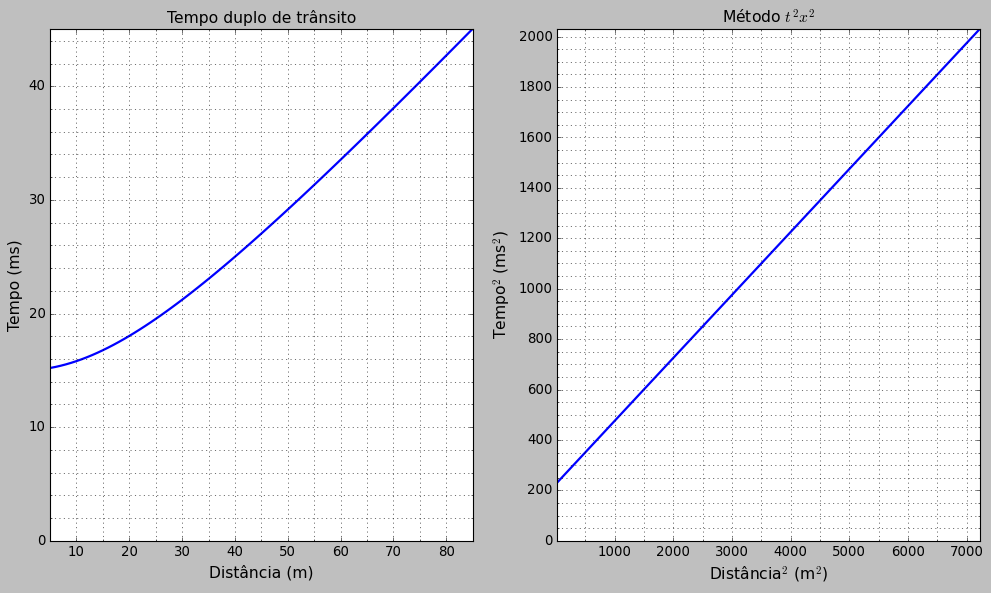

In [3]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(xx, t_refletido*1e3, linewidth=2)
ax1.set_xlabel('Distância (m)', fontsize=14)
ax1.set_ylabel('Tempo (ms)', fontsize=14)
ax1.set_title('Tempo duplo de trânsito', fontsize=14)
ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax1.yaxis.set_major_locator(plt.MultipleLocator(10))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax1.set_xlim(xx[0], xx[-1])
ax1.set_ylim(0, 1e3*np.max(t_refletido))
ax1.grid(which='both')

ax2.plot(xx**2, (t_refletido*1e3)**2, linewidth=2)
ax2.set_xlabel(r'Distância$^{2}$ (m$^{2}$)', fontsize=14)
ax2.set_ylabel(r'Tempo$^{2}$ (ms$^{2}$)', fontsize=14)
ax2.set_title(r'Método $t^{2}x^{2}$', fontsize=14)
ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(500))
ax2.yaxis.set_major_locator(plt.MultipleLocator(200))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax2.set_xlim(xx[0]**2, xx[-1]**2)
ax2.set_ylim(0, (1e3*np.max(t_refletido))**2)
ax2.grid(which='both')

plt.show()

# $t^{2}x^{2}$ com várias interfaces

In [4]:
v_intervalar = np.array([2000, 3000, 5000])    # m/s
t0 = np.array([5.0e-3, 12.0e-3, 20.0e-3])               # s

# -------

n_interfaces = len(v_intervalar)
v_rms = np.zeros(n_interfaces)

for i in range(1, n_interfaces+1):
    v_rms[i-1] = np.sqrt(np.sum((v_intervalar[:i]**2) * t0[:i]) / np.sum(t0[:i]))

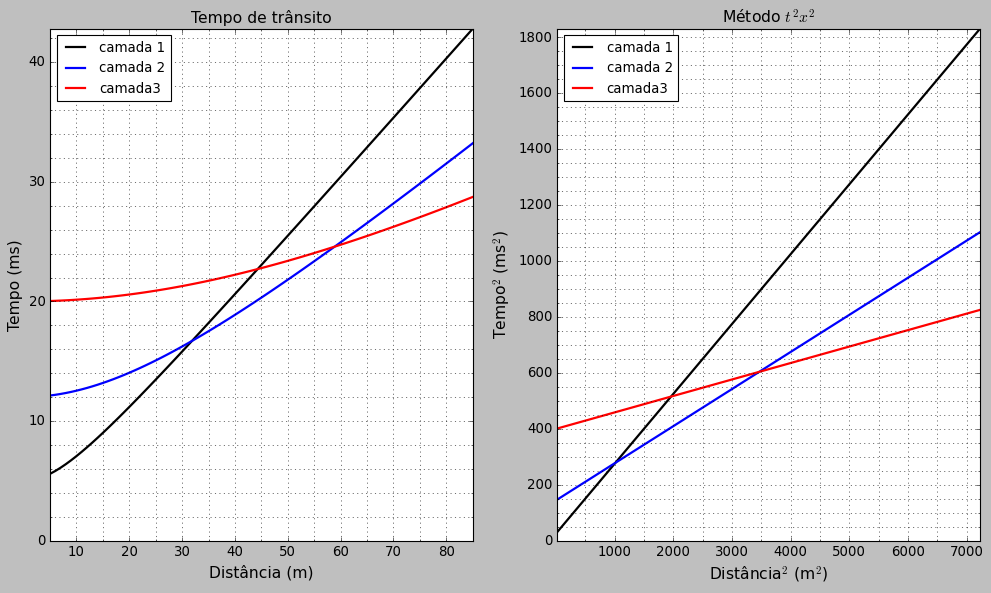

In [19]:
t_refletido = np.zeros((n_interfaces, len(xx)))
t_refratado = np.zeros((n_interfaces, len(xx)))
t_direto = xx / v_rms[0]

for n in range(n_interfaces):
    t_refletido[n, :] = np.sqrt( t0[n]**2 + (xx / v_rms[n])**2 )

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
cores = ['k', 'b', 'r']
labels = ['camada 1', 'camada 2', 'camada3']

for n in range(n_interfaces):
    ax1.plot(xx, 1e3*(t_refletido[n, :]), c=cores[n], label=labels[n], linewidth=2)
    
ax1.legend(loc='upper left', fontsize=12)
ax1.set_xlabel(r'Distância (m)', fontsize=14)
ax1.set_ylabel(r'Tempo (ms)', fontsize=14)
ax1.set_title('Tempo de trânsito', fontsize=14)
ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax1.yaxis.set_major_locator(plt.MultipleLocator(10))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax1.set_xlim(xx[0], xx[-1])
ax1.set_ylim(0, 1e3*np.max(t_refletido))
ax1.grid(which='both')

for n in range(n_interfaces):
    ax2.plot(xx**2, (1e3*t_refletido[n, :])**2, c=cores[n], label=labels[n], linewidth=2)
    
ax2.legend(loc='upper left', fontsize=12)
ax2.set_xlabel(r'Distância$^{2}$ (m$^{2}$)', fontsize=14)
ax2.set_ylabel(r'Tempo$^{2}$ (ms$^{2}$)', fontsize=14)
ax2.set_title(r'Método $t^{2}x^{2}$', fontsize=14)
ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(500))
ax2.yaxis.set_major_locator(plt.MultipleLocator(200))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax2.set_xlim(xx[0]**2, xx[-1]**2)
ax2.set_ylim(0, (1e3*np.max(t_refletido))**2)
ax2.grid(which='both')